# 🧩 Step 1 Import Libraries

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

print("✅ Libraries Imported Successfully")


✅ Libraries Imported Successfully


# 🧩 Step 2  Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv("emails.csv")

# Display basic information
print("✅ Dataset Loaded Successfully\n")
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns[:10], "...")  # show first 10 columns
df.head()


✅ Dataset Loaded Successfully

Shape of dataset: (5172, 3002)

Column names:
 Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou'], dtype='object') ...


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


# 🧩 Step 3 Check Data Info & Missing Values

In [3]:
# Check dataset info
df.info()

# Check if there are any missing values
print("\nMissing values in each column:\n")
print(df.isnull().sum().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB

Missing values in each column:

0


### df.isnull().sum() = Sums up True values column-wise.You get the number of missing values in each column.

### df.isnull().sum().sum() = The second .sum() adds up all column sums to get total missing values in the entire DataFrame.

# 🧩 Step 4  Feature and Target Separation

In [4]:
# Separate features (X) and target (y)
X = df.drop(columns=['Email No.', 'Prediction'])
y = df['Prediction']

print("✅ Features and Target separated successfully")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


✅ Features and Target separated successfully
Shape of X: (5172, 3000)
Shape of y: (5172,)


### df.drop(columns=['Email No.', 'Prediction'])  = removes the columns 'Email No.' and 'Prediction' from the dataset. The remaining columns are stored in X, which is your feature matrix.
### y = df['Prediction'] = df['Prediction'] selects the target column from your DataFrame.

# 🧩 Step 5  Split Data into Training and Testing Sets

In [5]:
# Split data into train and test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (4137, 3000)
Testing set size: (1035, 3000)


# 🧩 Step 6  Feature Scaling

In [6]:
# Normalize numeric features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature Scaling Completed")


✅ Feature Scaling Completed


### scaler = StandardScaler() = StandardScaler is a preprocessing tool from sklearn.preprocessing. It normalizes or standardizes numeric features so that each feature has: Mean = 0 and Standard Deviation = 1. This is important for many machine learning algorithms (like KNN, SVM, logistic regression) because they are sensitive to feature scales. scaler is an object that will learn the mean and standard deviation from the training data.
## -------------------------------------------------------------------------------------------------------------------------------------
## -------------------------------------------------------------------------------------------------------------------------------------
### fit_transform() does two things at once= Fit: Calculates the mean and standard deviation for each feature in X_train. Transform: Subtracts the mean and divides by standard deviation for each feature → Standardized features.Result is X_train_scaled, a scaled version of training features.
## --------------------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------------------
### X_test_scaled = scaler.transform(X_test) = transform() uses the same mean and standard deviation learned from training data to scale X_test. Important: We do not use fit_transform on test data, because we should never let the model see test data during training. Result is X_test_scaled, a scaled version of testing features.


# 🧩 Step 7  Train K-Nearest Neighbors Model

In [9]:
# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test_scaled) 

print("✅ KNN Model Trained Successfully")

# KNN uses the nearest 5 data points to classify an email as spam or not spam.  


✅ KNN Model Trained Successfully


# 🧩 Step 8 Train Support Vector Machine Model

In [10]:
# Initialize SVM model with linear kernel
svm = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_svm = svm.predict(X_test_scaled)

print("✅ SVM Model Trained Successfully")


✅ SVM Model Trained Successfully


### svm = SVC(kernel='linear', random_state=42) = SVC is the Support Vector Classifier from sklearn.svm. kernel='linear' → Uses a linear decision boundary to separate classes and Linear kernel works well when the data is linearly separable. random_state=42 → Ensures reproducibility of results (for any internal random processes).svm is now an untrained SVM model.


# 🧩 Step 9  Evaluate Models

In [11]:
# Evaluate KNN
print("🔹 KNN Model Evaluation 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Evaluate SVM
print("\n🔹 SVM Model Evaluation 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


🔹 KNN Model Evaluation 🔹
Accuracy: 0.8454106280193237

Confusion Matrix:
 [[593 146]
 [ 14 282]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88       739
           1       0.66      0.95      0.78       296

    accuracy                           0.85      1035
   macro avg       0.82      0.88      0.83      1035
weighted avg       0.89      0.85      0.85      1035


🔹 SVM Model Evaluation 🔹
Accuracy: 0.9468599033816425

Confusion Matrix:
 [[707  32]
 [ 23 273]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       739
           1       0.90      0.92      0.91       296

    accuracy                           0.95      1035
   macro avg       0.93      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



# 🧩 Step 10  Visualize Confusion Matrices

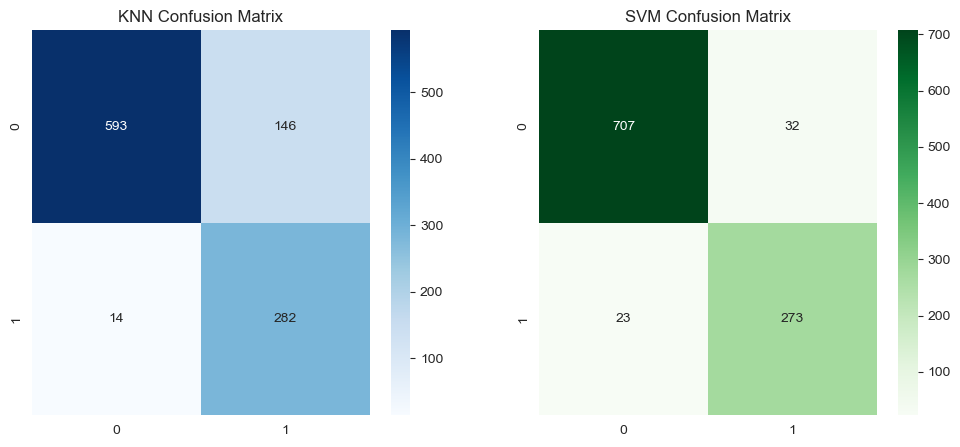

In [12]:
# Plot confusion matrices for better understanding
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")

plt.show()


# 🧩 Step 11  Compare Model Accuracies

In [13]:
# Compare accuracy of both models
accuracy_data = {
    'Model': ['KNN', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svm)
    ]
}

accuracy_df = pd.DataFrame(accuracy_data)
print("\n🔸 Model Comparison 🔸")
print(accuracy_df)



🔸 Model Comparison 🔸
  Model  Accuracy
0   KNN  0.845411
1   SVM  0.946860


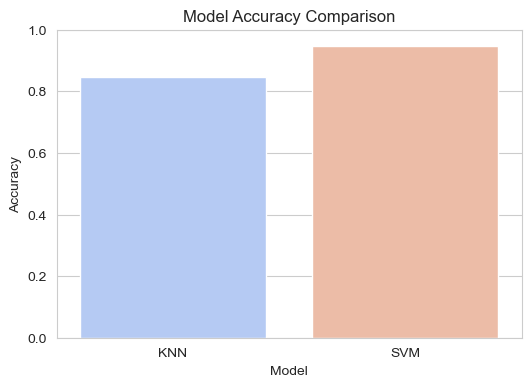

In [14]:
# Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='coolwarm')
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()